## Part 0

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

Importing the Dataset

In [2]:
df = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/avocado-updated-2020.csv')
df.head(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington
5,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
7,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston


## Part 1

Dataset contains the sales data of Avacados.
- date: The date of avocado sales data.
- average_price: The average price of avocados.
-  total_volume: The total volume of avocados sold.
- 4046, 4225, 4770: Codes representing different types or sizes of avocados sold.
- total_bags, small_bags, large_bags, xlarge_bags: The number of avocados sold in different bag sizes.
-  type: The type of avocado Conventional or Organic.
- year: The year of the sales data.
- geography: The geographical region where the data was collected.

**Renaming the data columns**

## Part 2

In [3]:
df.rename(columns={'4046': 'small_size', '4225': 'large_size', '4770': 'xlarge_size'}, inplace=True)

**Used ChatGPT for cleaning the data**

In [4]:
metro_regions = ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
                 'Buffalo/Rochester', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus',
                 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 'Harrisburg/Scranton',
                 'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas',
                 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile',
                 'New York', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Portland',
                 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
                 'San Francisco', 'Seattle', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa']

In [5]:
state_regions = {
    'Albany': 'New York', 'Atlanta': 'Georgia', 'Baltimore/Washington': 'Maryland/D.C.', 'Boise': 'Idaho', 
    'Boston': 'Massachusetts', 'Buffalo/Rochester': 'New York', 'Charlotte': 'North Carolina', 
    'Chicago': 'Illinois', 'Cincinnati/Dayton': 'Ohio', 'Columbus': 'Ohio', 'Dallas/Ft. Worth': 'Texas', 
    'Denver': 'Colorado', 'Detroit': 'Michigan', 'Grand Rapids': 'Michigan', 
    'Harrisburg/Scranton': 'Pennsylvania', 'Hartford/Springfield': 'Connecticut', 'Houston': 'Texas', 
    'Indianapolis': 'Indiana', 'Jacksonville': 'Florida', 'Las Vegas': 'Nevada', 'Los Angeles': 'California', 
    'Louisville': 'Kentucky', 'Miami/Ft. Lauderdale': 'Florida', 'Nashville': 'Tennessee', 
    'New Orleans/Mobile': 'Louisiana/Alabama', 'New York': 'New York', 'Northern New England': 'Vermont/New Hampshire/Maine', 
    'Orlando': 'Florida', 'Philadelphia': 'Pennsylvania', 'Phoenix/Tucson': 'Arizona', 'Pittsburgh': 'Pennsylvania', 
    'Portland': 'Oregon', 'Raleigh/Greensboro': 'North Carolina', 'Richmond/Norfolk': 'Virginia', 
    'Roanoke': 'Virginia', 'Sacramento': 'California', 'San Diego': 'California', 'San Francisco': 'California', 
    'Seattle': 'Washington', 'Spokane': 'Washington', 'St. Louis': 'Missouri', 'Syracuse': 'New York', 
    'Tampa': 'Florida'
}

In [6]:
major_regions = {
    'California': 'West', 'Florida': 'Southeast', 'New York': 'Northeast', 'Texas': 'South Central', 
    'Pennsylvania': 'Northeast', 'Ohio': 'Great Lakes', 'Michigan': 'Great Lakes', 'Illinois': 'Great Lakes', 
    'Arizona': 'West', 'Nevada': 'West', 'Washington': 'West', 'Georgia': 'Southeast', 'Indiana': 'Great Lakes', 
    'Kentucky': 'Midsouth', 'Tennessee': 'Midsouth', 'Colorado': 'West', 'Oregon': 'West', 
    'North Carolina': 'Southeast', 'Virginia': 'Southeast', 'Missouri': 'Plains', 'Louisiana': 'Midsouth', 
    'Alabama': 'Southeast', 'Connecticut': 'Northeast', 'Maryland/D.C.': 'Northeast', 
    'Vermont/New Hampshire/Maine': 'Northeast', 'Idaho': 'West'
}

**Converting region column to State, Major Region, Metro Region columns**

In [7]:

# Step 1: Use the state_regions dictionary to map metro regions to their states
df['state'] = df['geography'].map(state_regions)

# Step 2: Use the major_regions dictionary to map states to their major regions
df['major_region'] = df['state'].map(major_regions)

# Step 3: Define metro regions as per earlier categorization
metro_region = ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
                 'Buffalo/Rochester', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus',
                 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 'Harrisburg/Scranton',
                 'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas',
                 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile',
                 'New York', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Portland',
                 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
                 'San Francisco', 'Seattle', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa']

# Step 4: Create a new column 'region_type' to categorize as 'Metro Region' or 'Major Region'
df['region_type'] = df['geography'].apply(
    lambda x: 'Metro Region' if x in metro_regions else 'Major Region' if x in df['major_region'].unique() else 'Unknown'
)

# Step 5: Preview the updated DataFrame with all new columns
df[['geography', 'state', 'major_region', 'region_type']].drop_duplicates().head()

df['metro_region'] = df['geography'].where(df['geography'].isin(metro_region))

In [8]:
avocado_clean = df
avocado_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   small_size     33045 non-null  float64
 4   large_size     33045 non-null  float64
 5   xlarge_size    33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
 13  state          26316 non-null  object 
 14  major_region   25092 non-null  object 
 15  region_type    33045 non-null  object 
 16  metro_region   25704 non-null  object 
dtypes: float64(9), int64(1), object(7)
memory usage: 4

## Part 3

**Which major geographical region sold the most total organic, small Hass avocados in 2017?**

In [31]:
df_filteredby2017 = avocado_clean[(avocado_clean['type'] == 'organic') & (avocado_clean['year'] == 2017)]

df_grouped = df_filteredby2017.groupby('major_region')['small_size'].sum().reset_index()

top_region = df_grouped.loc[df_grouped['small_size'].idxmax()]

print( top_region['major_region'] + " has the most sales of small Hass avocados, " + "which is " + str(round(top_region['small_size']))+".")

West has the most sales of small Hass avocados, which is 2318654.


## Part 4

**Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

In [32]:

avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean['year'] = avocado_clean['date'].dt.year

average_volume_by_month = avocado_clean.groupby('month')['total_volume'].mean().reset_index()

highest_month = average_volume_by_month.loc[average_volume_by_month['total_volume'].idxmax()]

month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
highest_month_name = month_names[int(highest_month['month']) - 1]

print(f"{highest_month_name} has the highest average volum of avocado sales with avereage volume of {highest_month['total_volume']:.2f}.")

May has the highest average volum of avocado sales with avereage volume of 1123632.25.


## Part 5

**Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.**

In [61]:
top_five_metro = avocado_clean.groupby('metro_region')['total_volume'].mean().nlargest(5).index

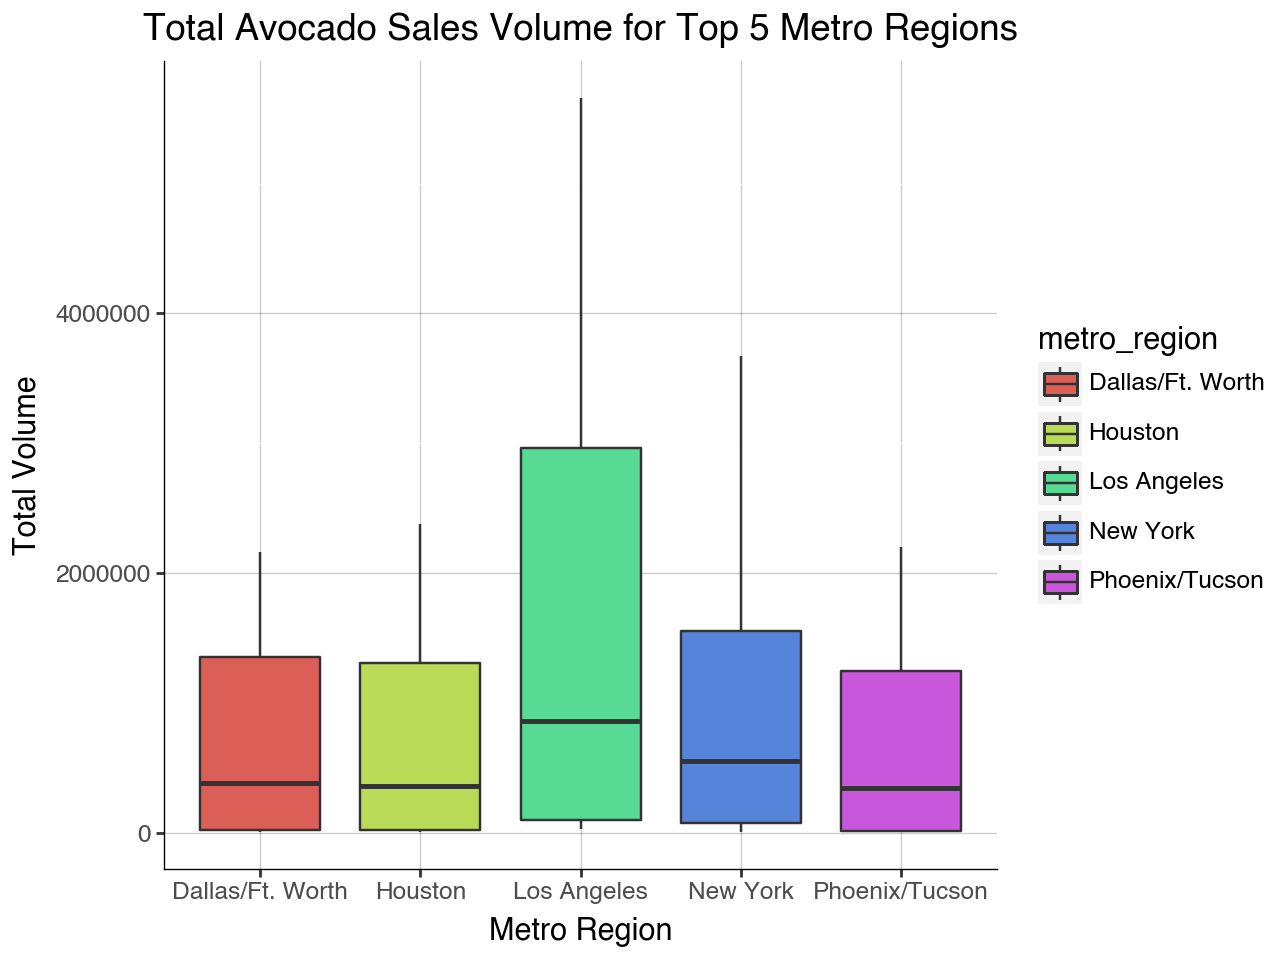

In [12]:
from plotnine import *

plot = (ggplot(avocado_clean[avocado_clean['metro_region'].isin(top_five_metro)],
                 aes(x='metro_region', y='total_volume',fill='metro_region')) +
        geom_boxplot() +
        labs(title='Total Avocado Sales Volume for Top 5 Metro Regions',
             x='Metro Region',
             y='Total Volume') +
        theme(
        panel_background=element_blank(), 
        axis_line=element_line(color='black', size=0.5),
        panel_grid_major_x= element_line(color='black', size=0.5, alpha = .2),
        panel_grid_major_y=element_line(color='black', size=0.5, alpha = .2),
                    )
        
)

plot.show()

**Los Angeles sold the most number of avocados.**

## Part 6

**Following dataset contains the data for the california regions: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".**

In [13]:
california_regions = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco', 'California']
avocado_california = avocado_clean[avocado_clean['metro_region'].isin(california_regions)]
avocado_california

,date,average_price,total_volume,small_size,large_size,xlarge_size,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,state,major_region,region_type,metro_region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,California,West,Metro Region,Los Angeles,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,California,West,Metro Region,Los Angeles,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,California,West,Metro Region,Sacramento,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,California,West,Metro Region,Sacramento,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,California,West,Metro Region,San Diego,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,California,West,Metro Region,Sacramento,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,California,West,Metro Region,San Diego,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,California,West,Metro Region,San Diego,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,California,West,Metro Region,San Francisco,11,29


## Part 7

In [45]:
import matplotlib.pyplot as plt
california_price_comparison = avocado_california.groupby(['metro_region', 'type'])['average_price'].mean().unstack()

california_price_comparison['price_difference'] = california_price_comparison['organic'] - california_price_comparison['conventional']

**Differences in Prices of conventional and Organic Avocados**

In [41]:
california_price_comparison

type,conventional,organic,price_difference
metro_region,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


**In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

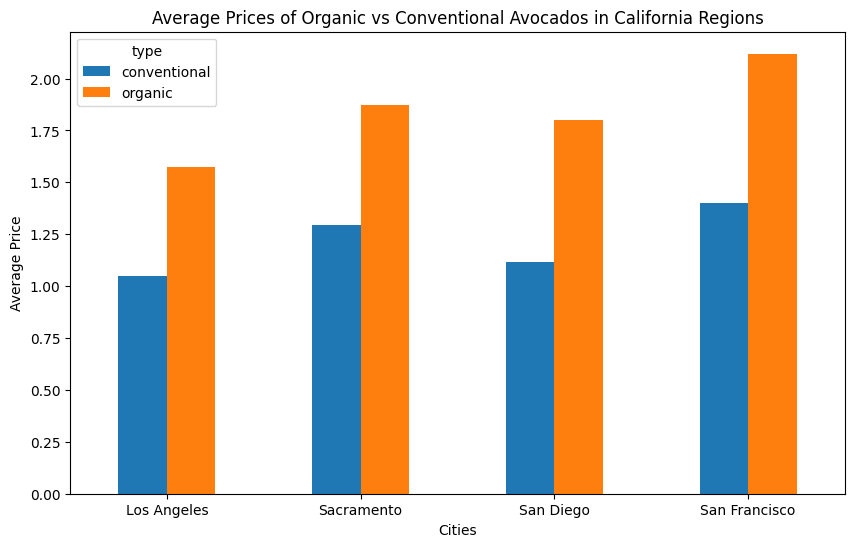

In [46]:
california_price_comparison[['conventional', 'organic']].plot(kind='bar', figsize=(10, 6))

plt.title('Average Prices of Organic vs Conventional Avocados in California Regions')
plt.ylabel('Average Price')
plt.xlabel('Cities')
plt.xticks(rotation=0)
plt.show()

**San Francisco has the most differnt price between conventional and organinc avocados.**

## Part 8

**The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic.**

/var/folders/nb/dnd338zx4qx6vlwx68gckp080000gn/T/ipykernel_22749/4156977420.py:45: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


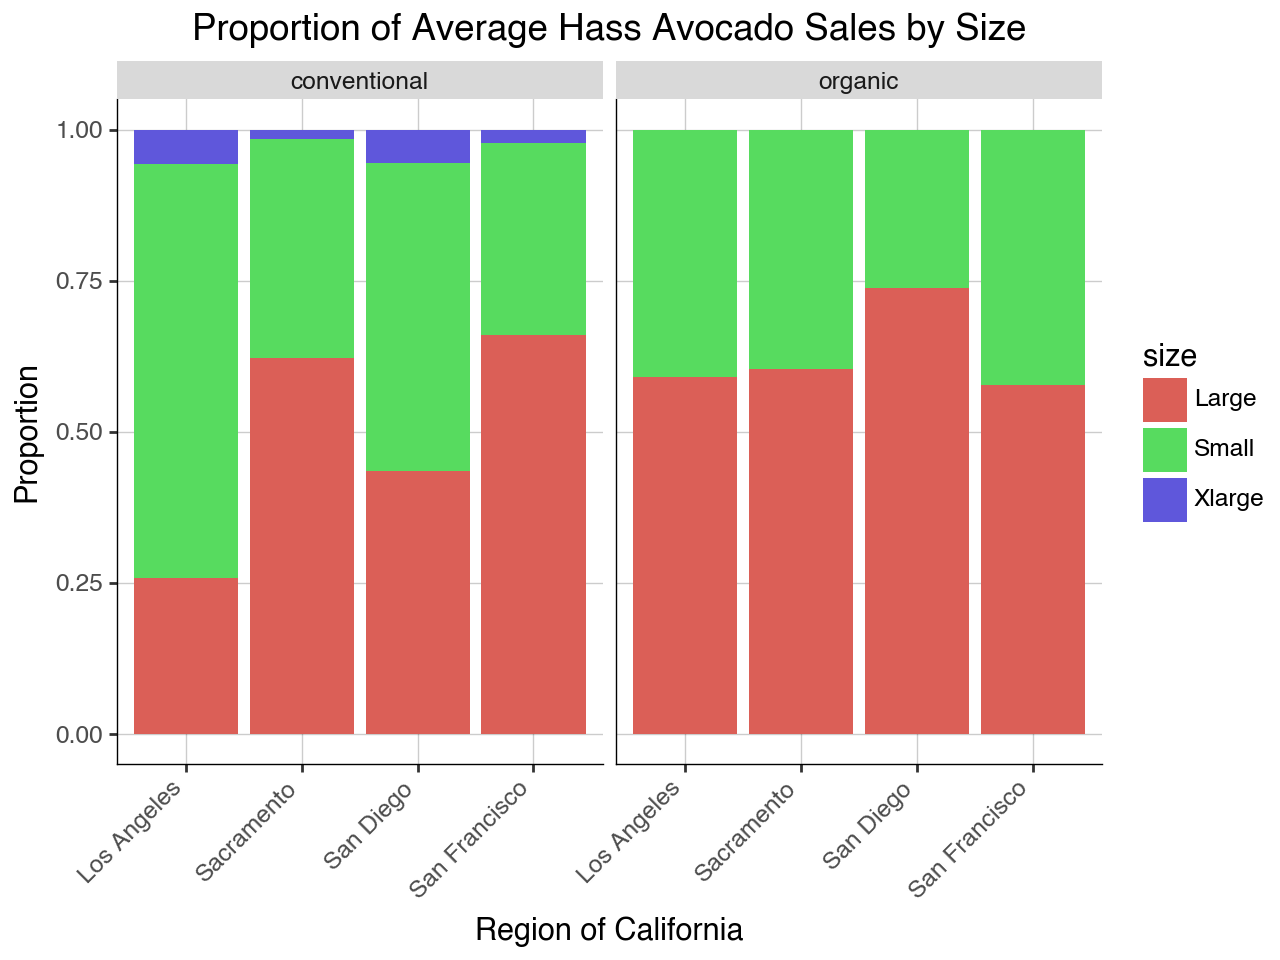

In [16]:
# Group by geography, type, and size (small, large, xlarge), then calculate the total sales for each
df_grouped = avocado_california.groupby(['metro_region', 'type']).agg(
    small_bags_sum=('small_size', 'sum'),
    large_bags_sum=('large_size', 'sum'),
    xlarge_bags_sum=('xlarge_size', 'sum')
).reset_index()

# Calculate total sales per geography and type
df_grouped['total_bags_sum'] = df_grouped['small_bags_sum'] + df_grouped['large_bags_sum'] + df_grouped['xlarge_bags_sum']

# Calculate proportions for small, large, and xlarge bags
df_grouped['small_proportion'] = df_grouped['small_bags_sum'] / df_grouped['total_bags_sum']
df_grouped['large_proportion'] = df_grouped['large_bags_sum'] / df_grouped['total_bags_sum']
df_grouped['xlarge_proportion'] = df_grouped['xlarge_bags_sum'] / df_grouped['total_bags_sum']

# Reshape the data for plotting
df_melted = df_grouped.melt(id_vars=['metro_region', 'type'],
                            value_vars=['small_proportion', 'large_proportion', 'xlarge_proportion'],
                            var_name='size', value_name='proportion')

# Rename size categories for clarity
df_melted['size'] = df_melted['size'].replace({
    'small_proportion': 'Small',
    'large_proportion': 'Large',
    'xlarge_proportion': 'Xlarge'
})

# Plot using plotnine
plot = (
    ggplot(df_melted, aes(x='metro_region', y='proportion', fill='size')) +
    geom_bar(stat='identity', position = position_stack(reverse=True)) +
    facet_wrap('~type', ncol=2) +
    labs(title='Proportion of Average Hass Avocado Sales by Size',
         x='Region of California', y='Proportion') +
    theme(
        axis_text_x= element_text(rotation=45, hjust=1),
        panel_background=element_blank(), 
        axis_line=element_line(color='black', size=0.5),
        panel_grid_major_x= element_line(color='black', size=0.5, alpha = .2),
        panel_grid_major_y=element_line(color='black', size=0.5, alpha = .2),
                    )
)

# Display the plot
print(plot)

**Creating new dataset with the help of ChatGPT**

In [58]:
california_state = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

house_prices = pd.DataFrame({
    'metro_region': np.repeat(california_state, 100),  # Each city will have 100 entries
    'house_price': np.concatenate([
        np.random.normal(900000, 100000, 100),  # Los Angeles house prices
        np.random.normal(700000, 80000, 100),   # San Diego house prices
        np.random.normal(500000, 50000, 100),    # Sacramento house prices
        np.random.normal(1200000, 120000, 100)   # San Francisco house prices
    ])
})

# Display the first few rows of the DataFrame
print(house_prices.head())

  metro_region    house_price
0  Los Angeles  939335.059992
1  Los Angeles  961949.194601
2  Los Angeles  809248.411914
3  Los Angeles  878255.497186
4  Los Angeles  769892.039788


In [59]:
joined_data = pd.merge(avocado_california, house_prices, on='metro_region', how='left')

/var/folders/nb/dnd338zx4qx6vlwx68gckp080000gn/T/ipykernel_22749/466881789.py:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


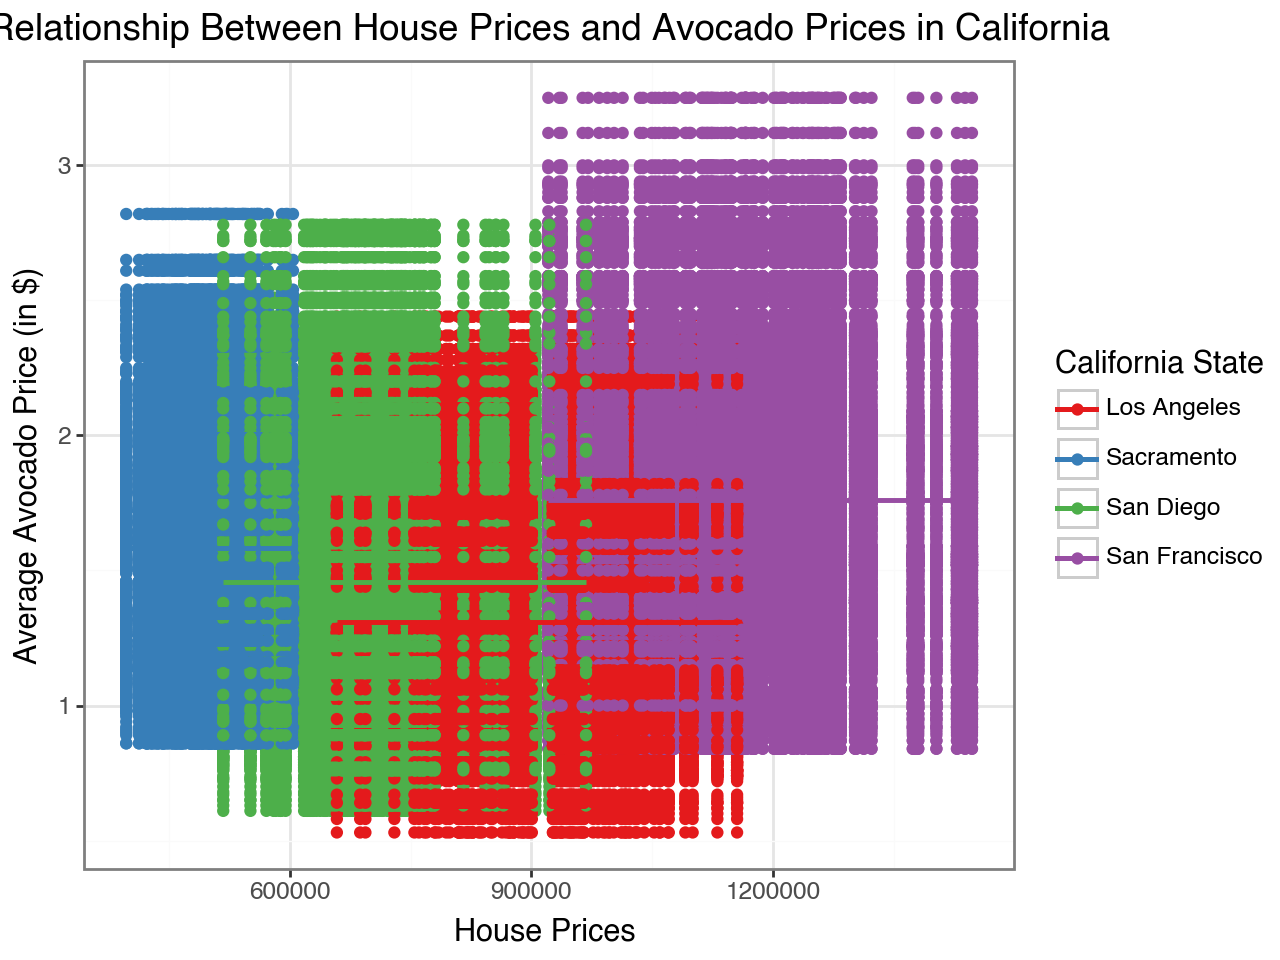

In [60]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_bw

print(
    ggplot(joined_data, aes(x='house_price', y='average_price', color='metro_region')) +
    geom_point() +
    geom_smooth(method='lm', se=False) +
    labs(title='Relationship Between House Prices and Avocado Prices in California',
         x='House Prices (in $)',
         y='Average Avocado Price (in $)',
         color='California State') +
    scale_color_brewer(type='qual', palette='Set1') +
    theme_bw()
)